<a href="https://colab.research.google.com/github/0xFAB10/Data-Analysis-Exercises/blob/main/Bynery_Study_Bank_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import altair as alt

In [2]:
file_url = 'https://raw.githubusercontent.com/'\
           'PacktWorkshops/The-Data-Science-Workshop/'\
           'master/Chapter03/bank-full.csv'
bank_data = pd.read_csv(file_url, sep=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
jobTot = bank_data.groupby('job')['y'].agg(jobTot='count').reset_index()
jobTot

,job,jobTot
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


In [4]:
jobProp = bank_data.groupby(['job', 'y'])['y'].agg(jobCat='count').reset_index()
jobProp

,job,y,jobCat
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364
5,entrepreneur,yes,123
6,housemaid,no,1131
7,housemaid,yes,109
8,management,no,8157
9,management,yes,1301


In [5]:
jobComb = pd.merge(jobProp,jobTot, on=['job'])
jobComb

,job,y,jobCat,jobTot
0,admin.,no,4540,5171
1,admin.,yes,631,5171
2,blue-collar,no,9024,9732
3,blue-collar,yes,708,9732
4,entrepreneur,no,1364,1487
5,entrepreneur,yes,123,1487
6,housemaid,no,1131,1240
7,housemaid,yes,109,1240
8,management,no,8157,9458
9,management,yes,1301,9458


In [6]:
jobComb['catProb'] = (jobComb.jobCat / jobComb.jobTot)*100
jobComb

,job,y,jobCat,jobTot,catProb
0,admin.,no,4540,5171,87.797331
1,admin.,yes,631,5171,12.202669
2,blue-collar,no,9024,9732,92.725031
3,blue-collar,yes,708,9732,7.274969
4,entrepreneur,no,1364,1487,91.728312
5,entrepreneur,yes,123,1487,8.271688
6,housemaid,no,1131,1240,91.209677
7,housemaid,yes,109,1240,8.790323
8,management,no,8157,9458,86.244449
9,management,yes,1301,9458,13.755551


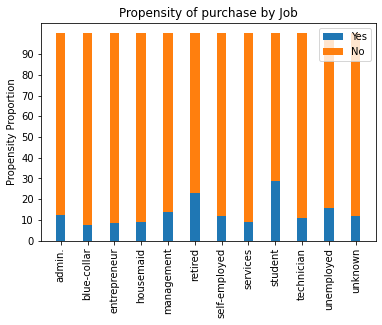

In [7]:
from matplotlib import pyplot as plt
import numpy as np

# Separete jobcomb between yes and no
jobCombYes = jobComb[jobComb['y'] == 'yes']
jobCombNo = jobComb[jobComb['y'] == 'no']

# Getting the number of (len) unique jobs
xlabels = jobTot['job'].nunique()

jobYes = jobCombYes.catProb.unique()
jobNo = jobCombNo.catProb.unique()

ind = np.arange(xlabels)
width = 0.35

p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width, bottom=jobYes)
plt.ylabel("Propensity Proportion")
plt.title("Propensity of purchase by Job")

# Named the rows and columns
plt.xticks(ind, jobTot['job'].unique())
plt.yticks(np.arange(0, 100, 10))

plt.legend((p1[-1], p2[1]), ('Yes', 'No'))
plt.xticks(rotation=90)
plt.show()